In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay


from keras.datasets import cifar10

import warnings
warnings.filterwarnings('ignore')

60000 images total. We have 10,000 testing images and 50,000 images for training. We further split the 50,000 images into 40,000 images for training and 10,000 images for validation

In [81]:
(X_tr, y_tr), (X_te, y_te) = cifar10.load_data()
seed = 1234 # for reproduction
# Concatenate train and test images
X = np.concatenate((X_tr,X_te))
y = np.concatenate((y_tr,y_te))
# Randomization
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=10000, random_state=seed,shuffle=True)
# size of X_tr = (50000,32,32,3) where (32,32) is size of the image and (3) is red,green,and blue channel values.
# we have 50000 datapoints for training set, and each set will have 32*32*3 = 3072 features. we need to reshape for training 
X_tr = X_tr.reshape(50000,3072)
X_te = X_te.reshape(10000,3072)
y_tr = y_tr.reshape(50000)
y_te = y_te.reshape(10000)


In [82]:
# Validation sets
X_val = X_tr[40000:50000]
y_val = y_tr[40000:50000]
# Training sets
X_tr = X_tr[:10000]
y_tr = y_tr[:10000]
print(X_tr.shape)
print(y_tr.shape)

(10000, 3072)
(10000,)


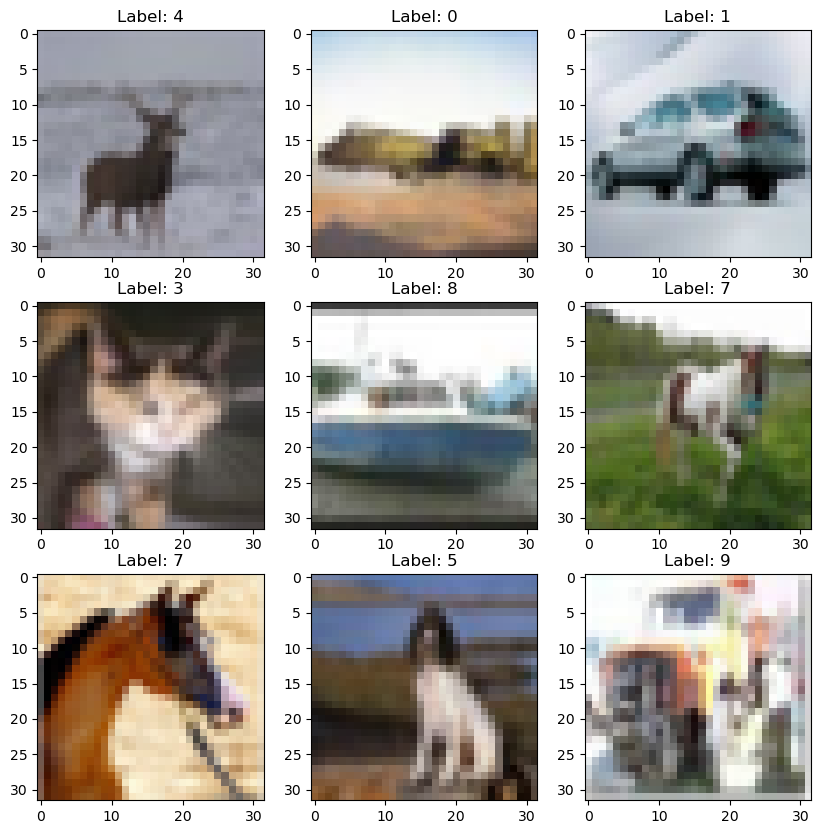

In [83]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10)) 

for i in range(9):
    img = X_tr[i]
    axes[i//3, i%3].imshow(img.reshape(32,32,3)) # to show the image, we have to convert 3072 features back to (32,32,3)
    label = y_tr[i] 
    axes[i//3, i%3].set_title(f'Label: {label}') 

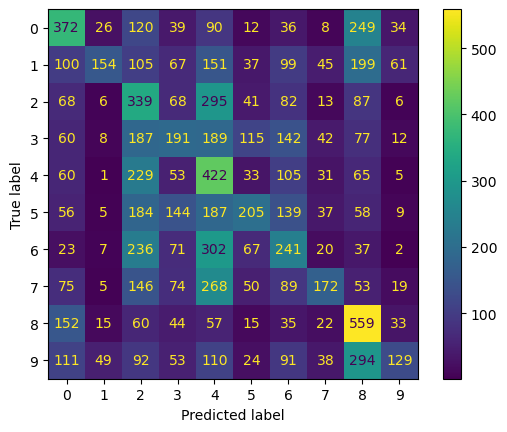

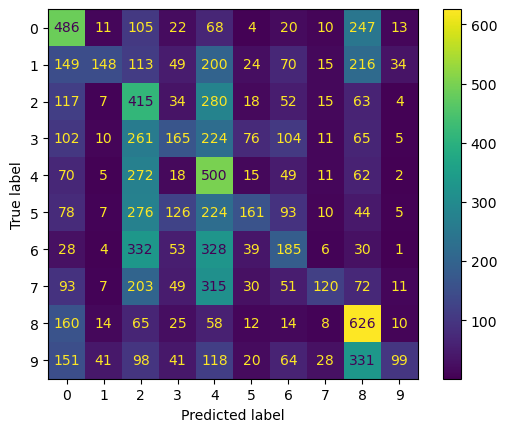

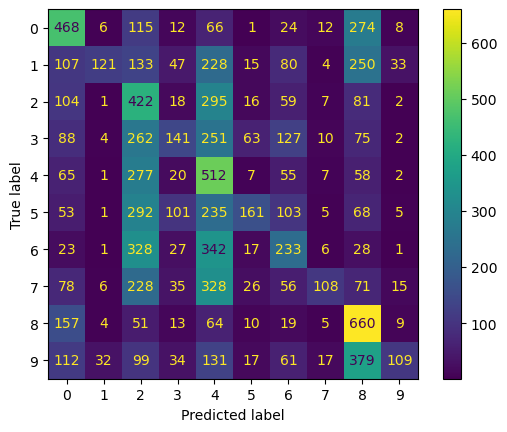

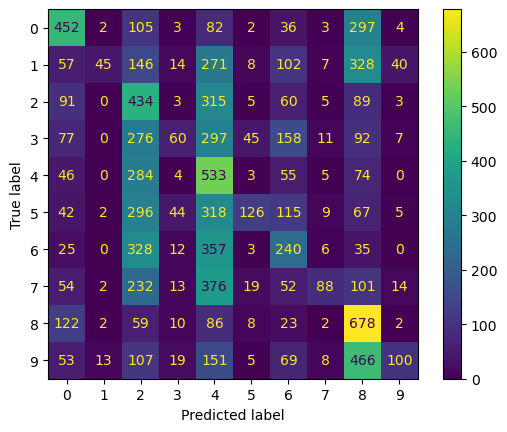

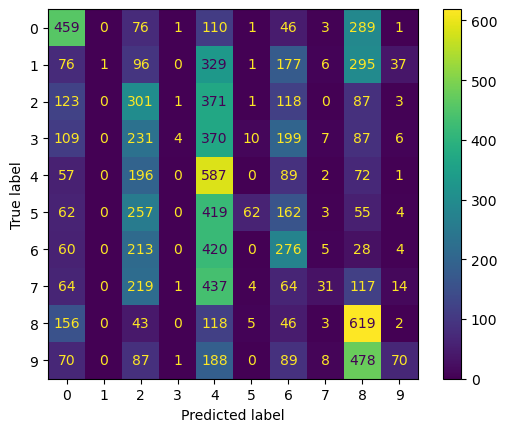

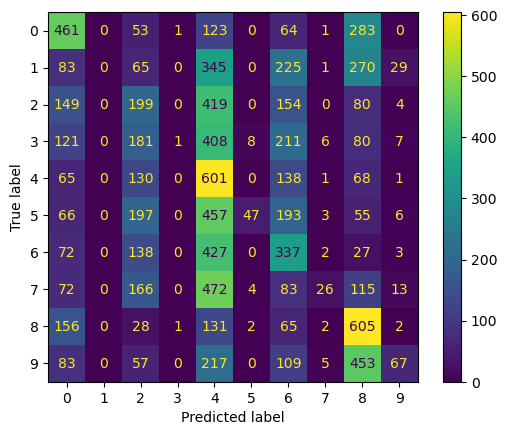

In [84]:
#KNN
k_vals = [1, 5, 10, 50,500,1000]
for i, k in enumerate(k_vals):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_tr, y_tr)
    y_te_pred = knn.predict(X_te)
    sklearn_cm = confusion_matrix(y_te, y_te_pred)
    sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
    sklearn_disp.plot()


